In [ ]:
# jupyter notebook to run on google collab
# Will train a CNN model for quick doodles base on google quickdraw data set

In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf 

In [2]:
# set up limited category list
categories = ['ant','bat','bird','camel','cat','cow','crab','dog','dragon','elephant','fish','frog','giraffe','horse','mouse','shark','apple','banana','grapes','pear','pineapple','strawberry','airplane','bicycle','bus','car','submarine','truck','van','sailboat','train']


In [3]:
!mkdir npy

mkdir: cannot create directory ‘npy’: File exists


In [4]:
cat_limit = categories[:30]
cat_limit

['ant',
 'bat',
 'bird',
 'camel',
 'cat',
 'cow',
 'crab',
 'dog',
 'dragon',
 'elephant',
 'fish',
 'frog',
 'giraffe',
 'horse',
 'mouse',
 'shark',
 'apple',
 'banana',
 'grapes',
 'pear',
 'pineapple',
 'strawberry',
 'airplane',
 'bicycle',
 'bus',
 'car',
 'submarine',
 'truck',
 'van',
 'sailboat']

In [38]:
len(async_categories)

30

In [5]:
# download npy data from google
import urllib.request
def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  counter = 1
  for i in cat_limit:
    space = i.replace('_', '%20')
    path = base+space+'.npy'
    print(f'{path} {counter}/{len(cat_limit)}')
    counter += 1
    urllib.request.urlretrieve(path, 'npy/'+i+'.npy')
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy 1/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy 2/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy 3/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy 4/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy 5/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cow.npy 6/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/crab.npy 7/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy 8/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dragon.npy 9/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/elephant.npy 10/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fish.npy 11/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/frog.npy 12/30
https://storage.googlea

In [6]:
all_files = glob.glob(os.path.join('npy', '*.npy'))

In [22]:
# load all files downlad in collab
# Join all of them in X and y
X = np.empty([0, 784])
y = np.empty([0])
async_categories = []

for idx, file in enumerate(all_files):
  data = np.load(file)
  data = data[0: 16500, :]
  labels = np.full(data.shape[0], idx)

  X = np.concatenate((X, data), axis=0)
  y = np.append(y, labels)
  
  category, extension = os.path.splitext(os.path.basename(file))
  async_categories.append(category)

banana


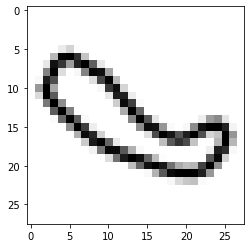

In [23]:
# Test a random image
import matplotlib.pyplot as plt
%matplotlib inline
testIndex=1000
plt.imshow(X[testIndex].reshape(28,28), cmap='binary')
print(async_categories[int(y[idx].item())])


In [24]:
async_categories

['banana',
 'shark',
 'truck',
 'ant',
 'bird',
 'cow',
 'dog',
 'horse',
 'elephant',
 'pineapple',
 'apple',
 'grapes',
 'strawberry',
 'bus',
 'crab',
 'camel',
 'giraffe',
 'car',
 'bat',
 'cat',
 'frog',
 'van',
 'mouse',
 'airplane',
 'fish',
 'sailboat',
 'dragon',
 'bicycle',
 'submarine',
 'pear']

In [25]:
# Scramble data a split data into test and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=24)

In [26]:
# Normalize to 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [27]:
# reshape input
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [28]:
X_train.shape[0]

396000

In [29]:
X_train.shape

(396000, 28, 28, 1)

In [30]:
# one hot encode y category
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(async_categories))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(async_categories))

In [31]:
print(f'{y_test.shape}.{y_train.shape}')
print(f'{X_test.shape},{X_train.shape}')
y_train.shape

(99000, 30).(396000, 30)
(99000, 28, 28, 1),(396000, 28, 28, 1)


(396000, 30)

In [32]:
# set up model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(async_categories), activation='softmax'))

# top_k=tf.keras.metrics.top_k_categorical_accuracy(k=3)
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy','top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)         

In [33]:
# train model
model.fit(x=X_train, y=y_train, batch_size=256, validation_split=0.1, verbose=2, epochs=8)

Epoch 1/8
1393/1393 - 13s - loss: 1.2598 - accuracy: 0.6306 - top_k_categorical_accuracy: 0.8828 - val_loss: 0.9347 - val_accuracy: 0.7246 - val_top_k_categorical_accuracy: 0.9334
Epoch 2/8
1393/1393 - 12s - loss: 0.8278 - accuracy: 0.7524 - top_k_categorical_accuracy: 0.9448 - val_loss: 0.8292 - val_accuracy: 0.7549 - val_top_k_categorical_accuracy: 0.9433
Epoch 3/8
1393/1393 - 12s - loss: 0.7285 - accuracy: 0.7801 - top_k_categorical_accuracy: 0.9541 - val_loss: 0.7310 - val_accuracy: 0.7833 - val_top_k_categorical_accuracy: 0.9527
Epoch 4/8
1393/1393 - 12s - loss: 0.6694 - accuracy: 0.7977 - top_k_categorical_accuracy: 0.9591 - val_loss: 0.6998 - val_accuracy: 0.7902 - val_top_k_categorical_accuracy: 0.9547
Epoch 5/8
1393/1393 - 12s - loss: 0.6304 - accuracy: 0.8087 - top_k_categorical_accuracy: 0.9622 - val_loss: 0.6763 - val_accuracy: 0.7976 - val_top_k_categorical_accuracy: 0.9562
Epoch 6/8
1393/1393 - 12s - loss: 0.6001 - accuracy: 0.8172 - top_k_categorical_accuracy: 0.9644 - v

In [34]:
# evaluate model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

3094/3094 [==============================] - 10s 3ms/step - loss: 0.6516 - accuracy: 0.8054 - top_k_categorical_accuracy: 0.9599
Test accuracy: 80.54%


In [35]:
# save and covert model with tensorflowjs
!pip install tensorflowjs

     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 144.4MB 114kB/s 
     |████████████████████████████████| 92kB 13.6MB/s 
     |████████████████████████████████| 256kB 51.1MB/s 
     |████████████████████████████████| 921kB 44.0MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=008dc826c24ce5687192efe56fd858a3c331b05826d78f684702383e7931d877
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 

In [39]:
import json
with open('easyCategories30.json', 'w') as outputFile:
  json.dump(async_categories, outputFile)

In [40]:
model.save('kerasEasy30.h5')

In [41]:
!mkdir model30

In [42]:
!tensorflowjs_converter --input_format keras kerasEasy25.h5 model30/

Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 735, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 739, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 654, in convert
    weight_shard_size_bytes=weight_shard_size_bytes)
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 74, in dispatch_keras_h5_to_tfjs_layers_model_conversion
    raise ValueError('Nonexistent path to HDF5 file: %s' % h5_path)
ValueError: Nonexistent path to HDF5 file: kerasEasy25.h5


In [44]:
!cp easyCategories.json model30/easyCategories30.json

cp: cannot stat 'easyCategories.json': No such file or directory


In [46]:
!zip -r modelEasy30.zip model30

  adding: model30/ (stored 0%)


In [47]:
from google.colab import files
files.download('modelEasy30.zip')

In [49]:
ones =np.ones([28,28])
ones=ones.reshape(1,28,28,1)
model.predict(ones)

array([[0.1125915 , 0.01288508, 0.01104837, 0.03050333, 0.05023453,
        0.02812885, 0.01063731, 0.02219381, 0.02418934, 0.0183125 ,
        0.01371581, 0.05518846, 0.01418327, 0.02066994, 0.06384679,
        0.01466418, 0.0074479 , 0.02709231, 0.05385209, 0.01279513,
        0.1090198 , 0.07127214, 0.0125962 , 0.03320799, 0.02094271,
        0.02076095, 0.06007454, 0.0025926 , 0.04330595, 0.02204667]],
      dtype=float32)

In [50]:
zeros =np.zeros([28,28])
zeros=zeros.reshape(1,28,28,1)
model.predict(zeros)

array([[0.03118444, 0.05128253, 0.04679228, 0.10333785, 0.04525694,
        0.03904418, 0.02130629, 0.0198996 , 0.02459828, 0.01163408,
        0.03070415, 0.05364661, 0.03274484, 0.03369369, 0.01878326,
        0.01818565, 0.00763363, 0.03046033, 0.03358366, 0.02137038,
        0.0209191 , 0.04622415, 0.03751025, 0.04571803, 0.04694395,
        0.03007615, 0.00782565, 0.00778745, 0.02781604, 0.05403662]],
      dtype=float32)

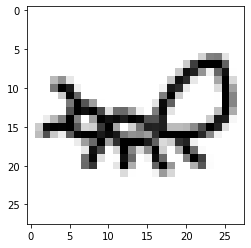

In [51]:
testI=18
plt.imshow(X_test[testI].reshape(28,28), cmap='binary')

In [53]:
prediction = model.predict(tf.expand_dims(tf.reshape(X_test[testI],[28,28,1]),0))
i=0
maxI = 0
max = prediction[0][0]
for i in range(len(prediction[0])):
  if (prediction[0][i]>max):
    max = prediction[0][i]
    maxI=i
  i+=1
print(async_categories[maxI])
# print(categories[y_test[150]])
print(max)
for ind in range(len(y_test[testI])):
  if y_test[testI][ind]==1:
    print(async_categories[ind])

ant
0.9960232
ant
